# Homework 3

## Part 1: Imbalanced Dataset
This part of homework helps you practice to classify a highly imbalanced dataset in which the number of examples in one class greatly outnumbers the examples in another. You will work with the Credit Card Fraud Detection dataset hosted on Kaggle. The aim is to detect a mere 492 fraudulent transactions from 284,807 transactions in total. 

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

Due Date : TBD

### Name: Chaewon Park

### UNI: cp3227

## 0 Setup

In [2]:
#pip install imblearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## 1 Data processing and exploration
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.1 Examine the class label imbalance
Let's look at the dataset imbalance:

**Q1. How many observations are there in this dataset? How many of them have positive label (labeled as 1)?**

In [5]:
# Your Code Here
print("Number of Observation:", len(raw_df))
print("Number of Positive Label:", len(raw_df[raw_df['Class']==1]))
print("Number of Negative Label:", len(raw_df[raw_df['Class']==0]))

Number of Observation: 284807
Number of Positive Label: 492
Number of Negative Label: 284315


### 1.2 Clean, split and normalize the data
The raw data has a few issues. First the `Time` and `Amount` columns are too variable to use directly. Drop the `Time` column (since it's not clear what it means) and take the log of the `Amount` column to reduce its range.

In [6]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**Q2. Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42.**

In [7]:
# Your Code Here
cleaned_df_X = cleaned_df.drop(columns=['Class'])
cleaned_df_y = cleaned_df['Class']
x_dev, x_test, y_dev, y_test = train_test_split(cleaned_df_X, cleaned_df_y, test_size=0.2, random_state= 42)

**Q3. Normalize the input features using the sklearn StandardScaler. Print the shape of your development features and test features.**

In [8]:
# Your Code Here
ss = StandardScaler()
x_dev = ss.fit_transform(x_dev)
x_test = ss.transform(x_test)

print("Shape of dev features:", x_dev.shape)
print("Shape of test features:", x_test.shape)

Shape of dev features: (227845, 29)
Shape of test features: (56962, 29)


### 1.3 Define the model and metrics
**Q4. First, fit a default logistic regression model. Print the AUC and average precision of 5-fold cross validation.**

In [16]:
# Your Code Here
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

original_model = LogisticRegression()
scores = cross_validate(original_model, x_dev, y_dev, cv=5, scoring = ['roc_auc' , 'average_precision'])
print("AUC:", scores['test_roc_auc'].mean())
print("Average Precision:", scores['test_average_precision'].mean())

AUC: 0.9737187470946873
Average Precision: 0.7608085616055361


**Q5.1. Perform random under sampling on the development set. What is the shape of your development features? How many  positive and negative labels are there in your development set? (Please set random state as 42 when performing random under sampling)**

In [17]:
# Your Code Here
rus = RandomUnderSampler(replacement=False, random_state=42)
X_dev_rus_subsample, y_dev_rus_subsample = rus.fit_resample(x_dev, y_dev)

print("Shape of original dev features: ", x_dev.shape)
print("Shape of subsampled dev features: ", X_dev_rus_subsample.shape)
print(y_dev_rus_subsample.value_counts())

# 394 positive and 394 negative labels exist in dev set.

Shape of original dev features:  (227845, 29)
Shape of subsampled dev features:  (788, 29)
0    394
1    394
Name: Class, dtype: int64


**Q5.2. Fit a default logistic regression model using under sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random under sampling)**

In [18]:
# Your Code Here
rus_model = LogisticRegression()
scores_rus = cross_validate(rus_model, X_dev_rus_subsample, y_dev_rus_subsample, cv=5, scoring = ['roc_auc' , 'average_precision'])
print("AUC:", scores_rus['test_roc_auc'].mean())
print("Average Precision:", scores_rus['test_average_precision'].mean())

AUC: 0.9754625121713728
Average Precision: 0.9809179697112904


**Q6.1. Perform random over sampling on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing random over sampling)**

In [19]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_ros_subsample, y_dev_ros_subsample = ros.fit_resample(x_dev, y_dev)

print("Shape of original dev features: ", x_dev.shape)
print("Shape of subsampled dev features: ", X_dev_ros_subsample.shape)
print(y_dev_ros_subsample.value_counts())

# 227451 positive and 227451 negative labels exist in dev set.

Shape of original dev features:  (227845, 29)
Shape of subsampled dev features:  (454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**Q6.2. Fit a default logistic regression model using over sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random over sampling)**

In [20]:
# Your Code Here
ros_model = LogisticRegression()
scores_ros = cross_validate(ros_model, X_dev_ros_subsample, y_dev_ros_subsample, cv=5, scoring = ['roc_auc' , 'average_precision'])
print("AUC:", scores_ros['test_roc_auc'].mean())
print("Average Precision:", scores_ros['test_average_precision'].mean())

AUC: 0.9877879287959128
Average Precision: 0.989712109318331


**Q7.1. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing SMOTE)**

In [22]:
# Your Code Here
smote = SMOTE(random_state=42)
X_dev_smote_subsample, y_dev_smote_subsample = smote.fit_resample(x_dev, y_dev)

print("Shape of original dev features: ", x_dev.shape)
print("Shape of subsampled dev features: ", X_dev_smote_subsample.shape)
print(y_dev_smote_subsample.value_counts())

# 227451 positive and 227451 negative labels exist in dev set.

Shape of original dev features:  (227845, 29)
Shape of subsampled dev features:  (454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**Q7.2. Fit a default logistic regression model using SMOTE. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing SMOTE)**

In [23]:
# Your Code Here
smote_model = LogisticRegression()
scores_smote = cross_validate(smote_model, X_dev_smote_subsample, y_dev_smote_subsample, cv=5, scoring = ['roc_auc' , 'average_precision'])
print("AUC:", scores_smote['test_roc_auc'].mean())
print("Average Precision:", scores_smote['test_average_precision'].mean())

AUC: 0.9901052003177705
Average Precision: 0.9912117732814473


**Q8. Plot confusion matrices on the test set for all four models above. Comment on your result.**

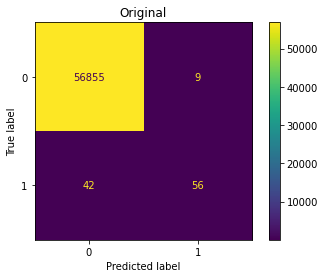

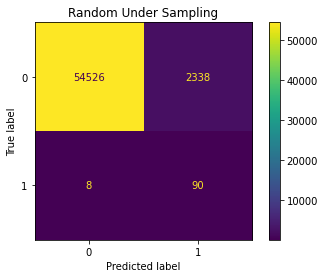

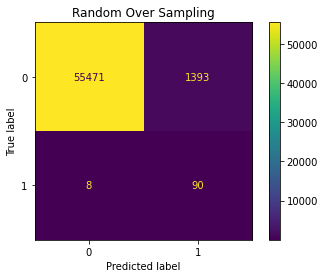

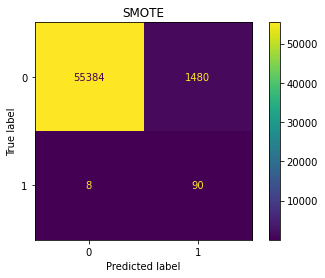

In [24]:
# Your Code Here
from sklearn.metrics import ConfusionMatrixDisplay

model_org =LogisticRegression().fit(x_dev, y_dev)
y_pred_org = model_org.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_org)
plt.title("Original")
plt.show()
print()

model_rus =LogisticRegression().fit(X_dev_rus_subsample, y_dev_rus_subsample)
y_pred_rus = model_rus.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rus)
plt.title("Random Under Sampling")
plt.show()
print()

model_ros =LogisticRegression().fit(X_dev_ros_subsample, y_dev_ros_subsample)
y_pred_ros = model_ros.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ros)
plt.title("Random Over Sampling")
plt.show()
print()

model_smote =LogisticRegression().fit(X_dev_smote_subsample, y_dev_smote_subsample)
y_pred_smote = model_smote.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote)
plt.title("SMOTE")
plt.show()

Comment: 
1) The original model has acc: 0.9991, precision: 0.8615, recall: 0.5714.

2) The RUS model has acc: 0.9588, precision: 0.0371, recall: 0.9184. This model has noticeably small precision but higher recall.

3) The ROS model has acc: 0.9754, precision: 0.0607, recall: 0.9184. This model has noticeably small precision but higher recall.

4) The SMOTE model has acc: 0.9739, precision: 0.0573, recall: 0.9184. This model has noticeably small precision but higher recall. 

The confusion matrix shows that SMOTE and random over sampling works much better than random under sampling.

**Q9. Plot the ROC for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

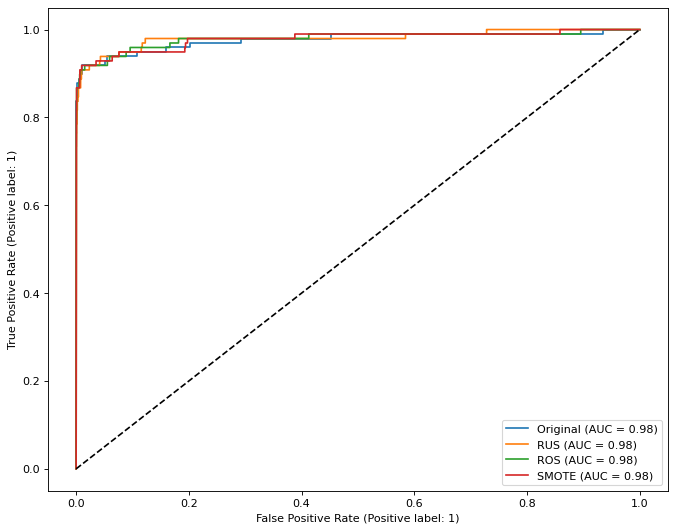

In [25]:
# Your Code Here

from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

from sklearn.metrics import plot_roc_curve

classifiers = [model_org, model_rus, model_ros, model_smote]
name = ["Original", "RUS", "ROS", "SMOTE"]

ax = plt.gca()
for index in range(len(classifiers)):
    plot_roc_curve(classifiers[index], x_test, y_test, ax = ax, name= name[index])
plt.plot([0,1],[0,1], 'k--')

Comment: All models are better than the random model which is the dotted diagonal line. Also all four models have an approximate AUC value of 0.98 because it was rounded. However, the graph visually shows that RUS, ROS, and SMOTE expands more left-outward than the blue graph, meaning those models are doing better than the baseline original model.

**Q10. Plot the precision-recall curve for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed i

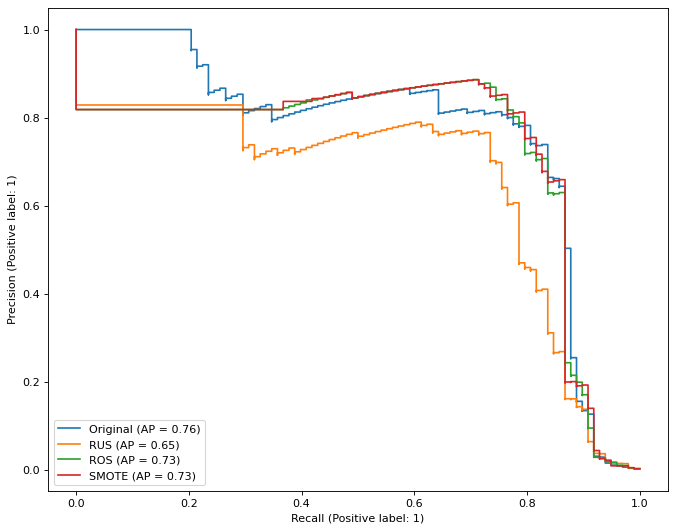

In [26]:
# Your Code Here
figure(figsize=(10, 8), dpi=80)
from sklearn.metrics import plot_precision_recall_curve

classifiers = [model_org, model_rus, model_ros, model_smote]
name = ["Original", "RUS", "ROS", "SMOTE"]

ax = plt.gca()
for index in range(len(classifiers)):
    plot_precision_recall_curve(classifiers[index], x_test, y_test, ax = ax, name= name[index])


Comment: All four models are curved towards the right, so they are doing somewhat well. The area under the curve for PR curve is Average Precision (AP) value, and each model has AP of around 0.65~0.76. The original model has the highest AP and the RUS has the lowest AP.

**Q11. Adding class weights to a logistic regression model. Print the AUC and average precision of 5-fold cross validation. Also, plot its confusion matrix on test set.**

AUC: 0.9767058445360919
Average Precision: 0.7509550474845972



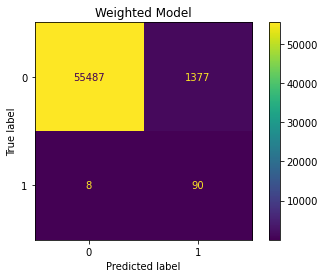

In [29]:
# Your Code Here
weighted_model = LogisticRegression(class_weight = 'balanced', random_state=42)
scores = cross_validate(weighted_model, x_dev, y_dev, cv=5, scoring = ['roc_auc' , 'average_precision'])
print("AUC:", scores['test_roc_auc'].mean())
print("Average Precision:", scores['test_average_precision'].mean())
print()
model_weighted =weighted_model.fit(x_dev, y_dev)
y_pred_weighted = model_weighted.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_weighted)
plt.title("Weighted Model")
plt.show()
print()

**Q12. Plot the ROC and the precision-recall curve for default Logistic without any sampling method and this balanced Logistic model in two single plots. Make sure to label the axes and legend. Comment on your result.**

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


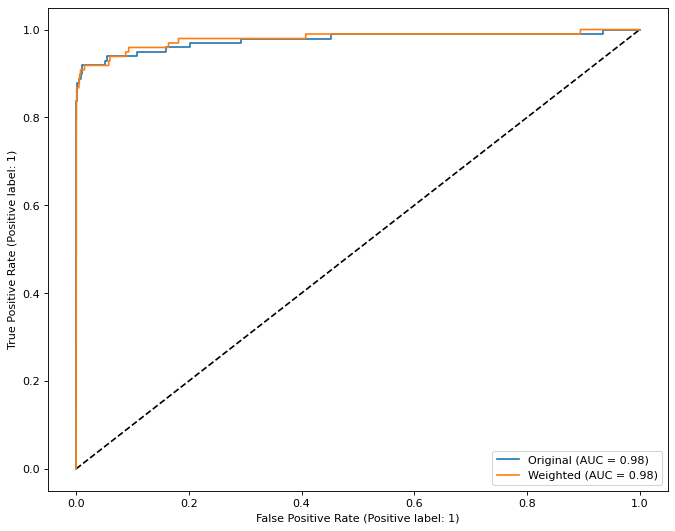

In [30]:
# Your Code Here

## ROC
figure(figsize=(10, 8), dpi=80)
classifiers = [model_org, model_weighted]
name = ["Original", "Weighted"]
plt.plot([0,1],[0,1], 'k--')

ax = plt.gca()
for index in range(len(classifiers)):
    plot_roc_curve(classifiers[index], x_test, y_test, ax = ax, name= name[index])

Comment: All models are better than the random model which is the dotted diagonal line. Also all two models have an AUC of 0.98, which is very closer to 1. Visually, the weighted model graph is expanded more left-outward meaning it is performing better.

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


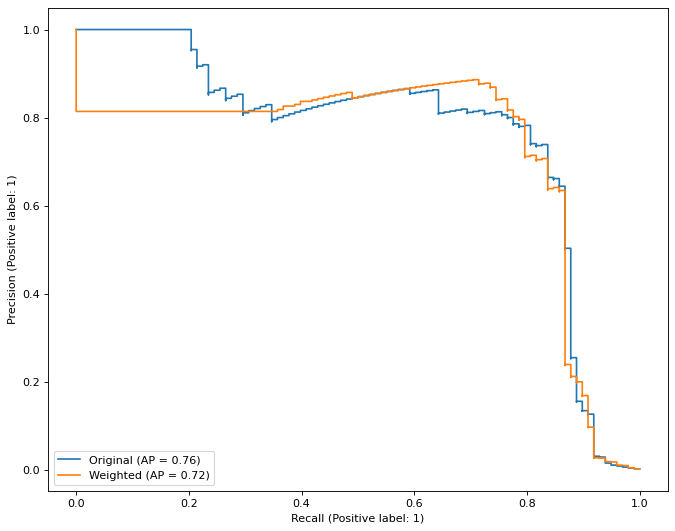

In [31]:
## PR Curve
figure(figsize=(10, 8), dpi=80)
classifiers = [model_org, model_weighted]
name = ["Original", "Weighted"]

ax = plt.gca()
for index in range(len(classifiers)):
    plot_precision_recall_curve(classifiers[index], x_test, y_test, ax = ax, name= name[index])

Comment: Both models are curved towards the right, so they are doing somewhat well. The area under the curve for PR curve is Average Precision (AP) value, and the original model has a higher AP than the weighted model.

## Part 2: Unsupervised Learning

In this part, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

### Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source is on Coursework.

In [32]:
cell_gene_counts_df = pd.read_csv('data/mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [33]:
cell_metadata_df = pd.read_csv('data/mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [34]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [35]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## 1 PCA

**Q1. Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [36]:
### Your code here
from sklearn.decomposition import PCA

print("Original Data Shape:",cell_gene_counts_df.shape)
pca = PCA(n_components = 50)
X_pca = pca.fit_transform(cell_gene_counts_df)
print("PCA Applied Data Shape:", X_pca.shape)

Original Data Shape: (1000, 18585)
PCA Applied Data Shape: (1000, 50)


**Q2. Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

As can be seen below, 20% of the total variance in the dataset is explained by the first 20 principal components.

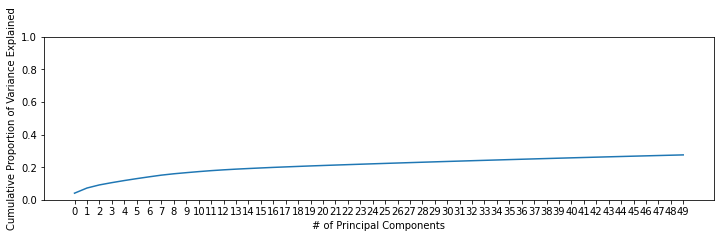

0    0.207652
Name: 19, dtype: float64
0    0.275342
Name: 49, dtype: float64


In [37]:
### Your code here
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,3)

## get first 20 principal component
explained_var_ratio_df = pd.DataFrame(pca.explained_variance_ratio_)
var_cumsum = explained_var_ratio_df.cumsum()
var_cumsum.plot(legend=False)

plt.xticks(range(0,50))
plt.ylim([0,1])
plt.xlabel("# of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

print(var_cumsum.loc[19])
print(var_cumsum.loc[49])

**Q3. For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [38]:
components = pca.components_
print(components.shape)
print("First PC Corresponding Loadings shape:", components.T[:, 0].shape)

indexes = components.T[:, 0].argsort()[-10:][::-1]
print("<answer>")
print("Gene Names:",cell_gene_counts_df.columns[indexes])
print("Weights: ", components.T[:, 0][indexes])

(50, 18585)
First PC Corresponding Loadings shape: (18585,)
<answer>
Gene Names: Index(['Nsg2', 'St8sia3', 'Ptpn5', 'Kcnj4', 'Rasgef1a', 'Camkv', 'Hpca',
       'Cpne5', 'Nrsn2', 'Erc2'],
      dtype='object')
Weights:  [0.02667316 0.02659468 0.02658801 0.02653924 0.02634748 0.02622075
 0.02617311 0.02602185 0.02597897 0.02585256]


**Q4. Plot the projection of the data onto the first two principal components using a scatter plot.**

Text(0, 0.5, 'second principal component')

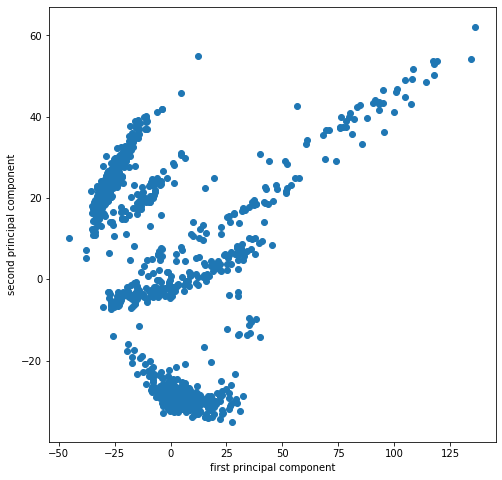

In [39]:
### Your code here
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

**Q5. Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

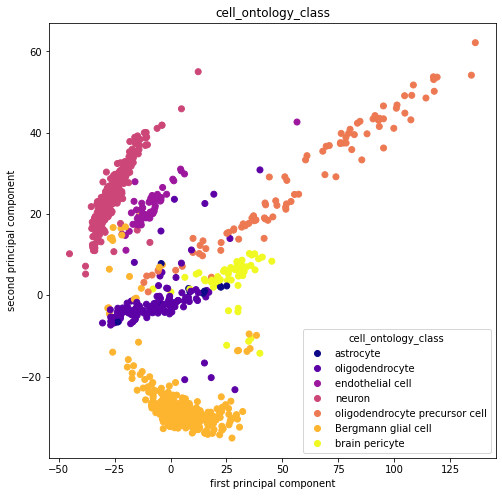

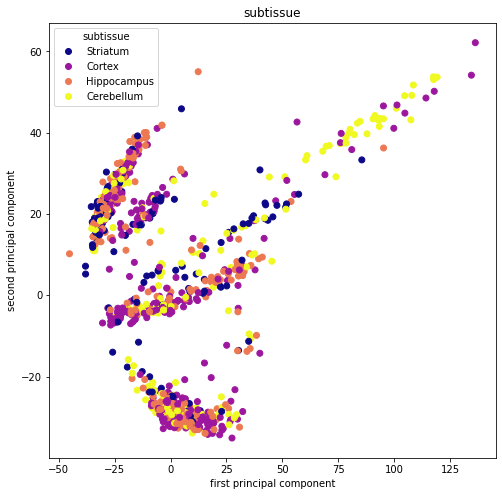

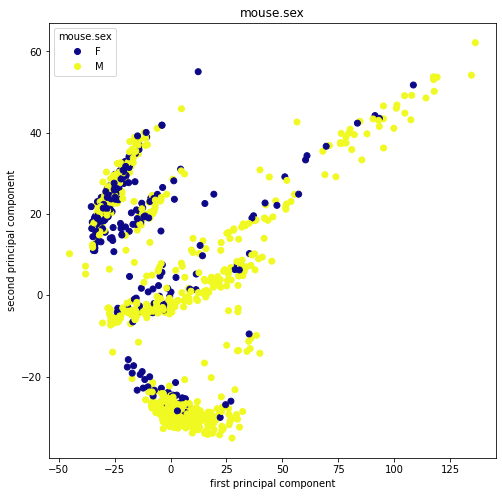

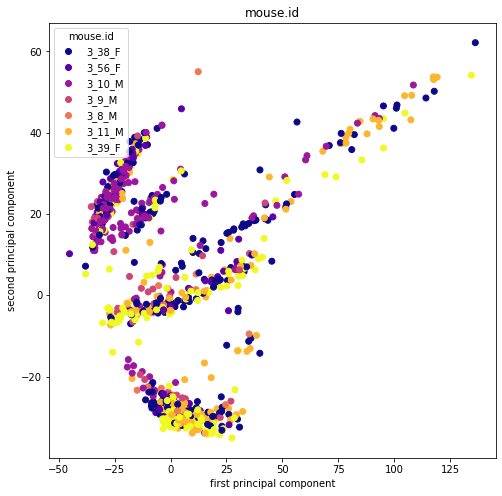

In [43]:
### Your code here

# cell_ontology_class
plt.figure(figsize=(8,8))
color_labels = cell_metadata_df['cell_ontology_class'].unique().tolist()
scatter = plt.scatter(X_pca[:,0], X_pca[:, 1], c = cell_metadata_df['cell_ontology_class'].astype('category').cat.codes, cmap='plasma')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("cell_ontology_class")
plt.legend(handles=scatter.legend_elements()[0], labels= color_labels, title="cell_ontology_class")
plt.show()


# subtissue
plt.figure(figsize=(8,8))
color_labels = cell_metadata_df['subtissue'].unique().tolist()
scatter = plt.scatter(X_pca[:,0], X_pca[:, 1], c = cell_metadata_df['subtissue'].astype('category').cat.codes, cmap='plasma')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("subtissue")
plt.legend(handles=scatter.legend_elements()[0], labels= color_labels, title="subtissue")
plt.show()


#mouse.sex
plt.figure(figsize=(8,8))
color_labels = cell_metadata_df['mouse.sex'].unique().tolist()
scatter = plt.scatter(X_pca[:,0], X_pca[:, 1], c = cell_metadata_df['mouse.sex'].astype('category').cat.codes, cmap='plasma')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("mouse.sex")
plt.legend(handles=scatter.legend_elements()[0], labels= color_labels, title="mouse.sex")
plt.show()


# mouse.id
plt.figure(figsize=(8,8))
color_labels = cell_metadata_df['mouse.id'].unique().tolist()
scatter = plt.scatter(X_pca[:,0], X_pca[:, 1], c = cell_metadata_df['mouse.id'].astype('category').cat.codes, cmap='plasma')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("mouse.id")
plt.legend(handles=scatter.legend_elements()[0], labels= color_labels, title="mouse.id")
plt.show()


**Q6. Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

### Your answer here
Since the clusters are well formed for the 'cell_ontology_class' plot, we can conclude that the first two principle components correspond to the 'cell_ontology_class' dimension.

## 2 K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Q7. Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [73]:
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    ### Your code here
    # randomly initialize centroid
    n = X.shape[0]
    y = np.zeros((n,)) 
    
    idxs = np.random.choice(n, k, replace=False)
    centroids = X[idxs]
  
    for epoch in range(iters):
        # for each observation
        for i in range(n):
            row = X[i]
            min_ = float('inf')

            for idx in range(len(centroids)):
                centroid = centroids[idx]
                distance = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if min_ > distance:
                    min_ = distance
                    y[i] = idx
        # update centroids to new ones     
        centroids = pd.DataFrame(X).groupby(by=y).mean().values  

    return y    

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

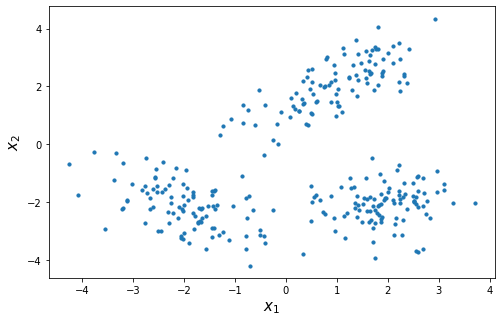

In [74]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Q8. Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

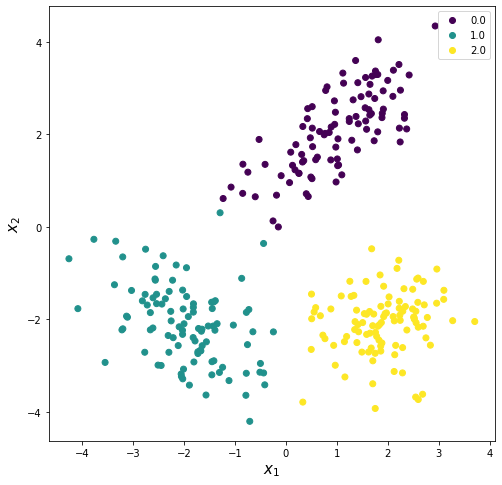

In [75]:
### Your code here
cluster_assignment = kmeans(X,3)
color_labels = np.unique(cluster_assignment).tolist()

plt.figure(figsize=(8, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c = cluster_assignment)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend(handles=scatter.legend_elements()[0],labels=color_labels)
plt.show()

**Q9. Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

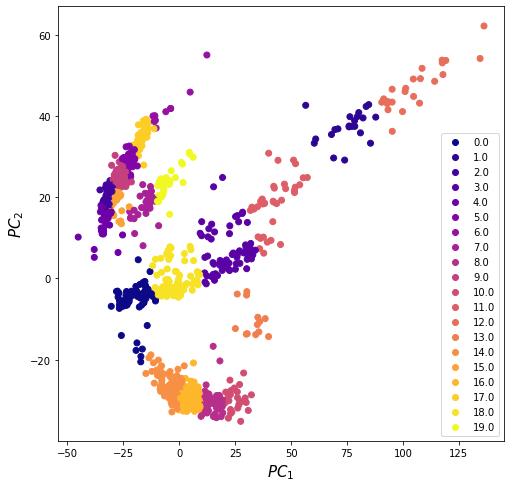

In [76]:
### Your code here
cluster_assignment = kmeans(X_pca[:,:20],20)
color_labels = np.unique(cluster_assignment).tolist()

plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cluster_assignment, cmap= 'plasma')
plt.xlabel('$PC_1$', fontsize=15)
plt.ylabel('$PC_2$', fontsize=15)
plt.legend(handles=scatter.legend_elements(prop='colors', num=None)[0],labels=color_labels)
plt.show()

## 3 t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Q10. Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [77]:
### Your code here
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2)
tsne_result = tsne.fit_transform(X_pca[:,:20])
tsne_result.shape

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

**Q11. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

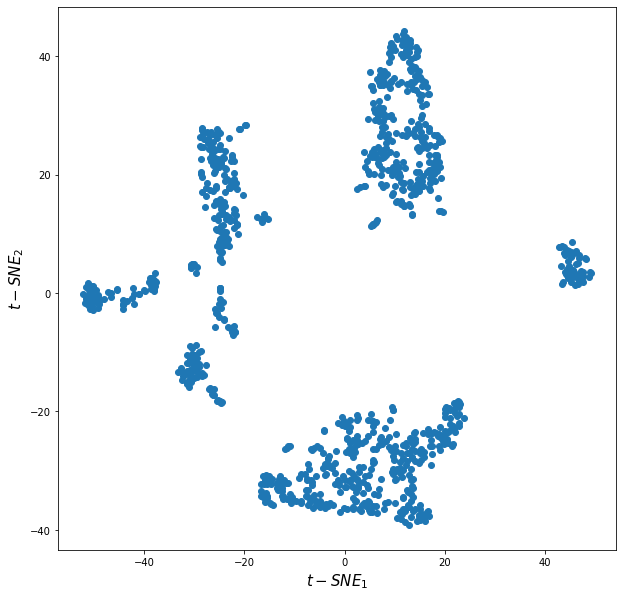

In [78]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(tsne_result[:, 0],tsne_result[:, 1])
plt.xlabel('$t-SNE_1$', fontsize=15)
plt.ylabel('$t-SNE_2$', fontsize=15)
plt.show()

**Q12. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

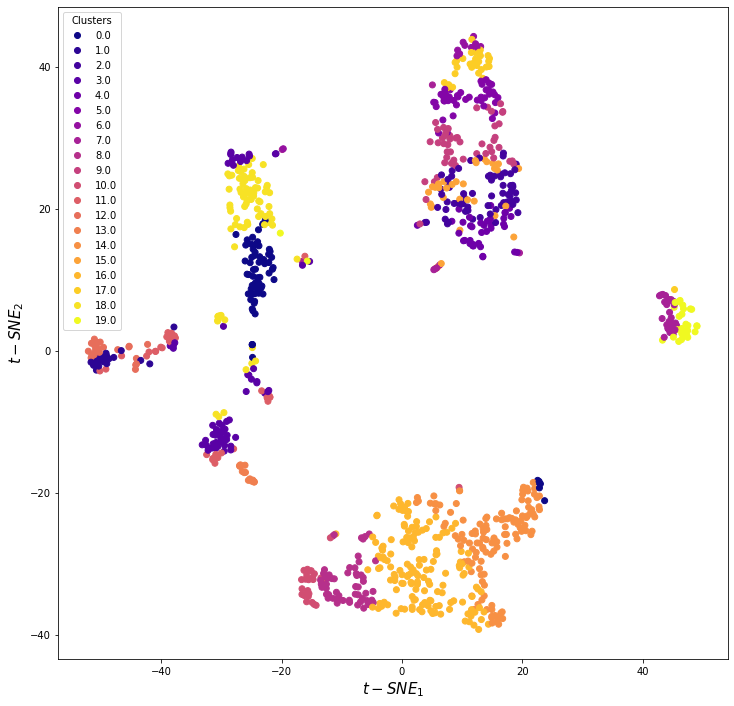

In [79]:
### Your code here
plt.figure(figsize=(12,12))

scatter = plt.scatter(tsne_result[:,0],tsne_result[:,1],c=cluster_assignment, cmap='plasma')
plt.xlabel('$t-SNE_1$', fontsize=15)
plt.ylabel('$t-SNE_2$', fontsize=15)
plt.legend(handles=scatter.legend_elements(prop='colors', num=None)[0],labels=color_labels,title="Clusters")
plt.show()

**Q13. Why is there overlap between points in different clusters in the t-SNE plot above?**

Some of the points in different clusters overlap because projecting high dimensional data into low dimension causes loss of information. Hence, the points which do not overlap (are far away) in high dim somehow gets projected to the same low dimensional space because it loses some information that made the points different.
Also, it depends on what the perplexity value is.

### Your answer here

These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.